# Introduction

This meeting is to propose a 1 hour workshop on how to analyse coutn data.

HelloFresh runs a lot of experiments. The results of an experiment could mean millions in revenue. It is vital that we analyse the results correctly.

Currently the methods we use to analyse the data are not sensitive enough - we miss some significant results. This talk proposes an alternative.

# Hypothesis Testing for Count Data

This notebook is an introduction to hypothesis testing, with a focus on count data and a worked example comparing different groups within a DS and CRM experiment.

Structure:
* A/B Testing overview
* Hypothesis testing
* Count data
* Hypothesis testing for count data

# A/B Testing

An A/B(/C) test is a randomised experiment with two variants, A and B (plus a control group). 

For example in September DS + CRM sent DM's to 20,000 customers (10k DS, 10k BaU) to compare methods of selecting the most valuable customers. 

![title](abtest.jpg)

Hellofresh currently uses the Mann-Whitney U to analyse the results of CRM A/B tests. However:

* The MW test is not appropriate for distributions with a lot of ties.
* The MW test cannot be used to compare means.
* In particular for count data with a lot of zeros the medians of two groups will be the same i.e. zero.
	
    *“t-Tests are widely used by researchers to compare the average values of a numeric outcome between two groups. If there are doubts about the suitability of the data for the requirements of a t-test, most notably the distribution being non-normal, the Wilcoxon-Mann-Whitney test may be used instead. However, although often applied, **both tests may be invalid when discrete and/or extremely skew data are analyzed**. In medicine, extremely skewed data having an excess of zeroes are often observed, representing a numeric outcome that does not occur for a large percentage of cases (so is often zero) but which also sometimes takes relatively large values. **For data such as this, application of the t-test or Wilcoxon-Mann-Whitney test could lead researchers to draw incorrect conclusions**. A valid alternative is regression modeling to quantify the characteristics of the data...”*
    
When t-tests or Wilcoxon-Mann-Whitney tests won't do. McElduff F, et al. Adv Physiol Educ. 2010.

To reiterate: the purpose of this workshop is to outline an alternative method of analysing data generated by CRM experiments.

### Hypothesis Testing

We have conducted an experiment. 
* We have taken measurements from two populations. 
* $N_1$ measurements from group A $\{X_1, X_2, \ldots, X_{N_1}\}$
* $N_2$ measurements from group B $\{Y_1, Y_2, \ldots, Y_{N_2}\}$.
* The measurements all come from the same distribution and are real valued.

We would like to test the hypotheses

$H_0$: $\bar{X} = \bar{Y}$

$H_1$: $\bar{X} \neq \bar{Y}$

Where $\bar{X} = \frac{1}{N_1} \sum_{n=0}^{N_1} X_n $, and $\bar{Y} = \frac{1}{N2} \sum_{n=0}^{N2} Y_n $. 

That is: we wish to test whether the distributions have equal means, or not, based on the measurements we have taken.

## t-test

The $t$ score is *a ratio of the difference between groups to the difference within groups*. 

The simplest $t$-test is the one sample $t$-test The one-sample $t$-score is given by;

$$ t = \frac{\bar{X} - \mu}{\sqrt{\frac{s_1^2}{N1}}} $$

Where $s_1$ is the sample variance of the group.

We illustrate how to conduct a more general $t$-test, for groups with unequal sample sizes and variances (Welch's $t$-test).

![title](ttest.jpg)

There are three steps to conducting a $t$-test.

* First compute the t-statistic:

$$ t = \frac{\bar{X} - \bar{Y} }{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} $$ 

where $s_1$ is the sample variance of group 1, $s_2$ is the sample variance of group 2.

* Then compute the degrees of freedom:

$$ \nu = \frac{\left(\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2(N_1-1)} + \frac{s_2^4}{N_2^2(N_2-1)}} $$ 

* Use a table from the $t$-distribution to calculate a p-value (essentially if $t > t_{crit} = 1.645$ then the p-value is 0.05).


## ANOVA

Analysis of Variance (ANOVA) is a hypothesis-testing technique used to test the equality of two
or more population (or treatment) means by examining the variances of samples that are taken.

An ANOVA tests the hypothesis that amongst three (or more!) groups, the means are equal.

* $H_1$: $\mu_1 = \mu_2 = \ldots = \mu_n = \mu$

* $H_2$: $\mu_i \neq \mu$ for some group $i$.

Where $ \mu_i$ is the mean of group $i$, and $\mu $ is the mean of the entire population. 

![title](anova.png)

An ANOVA, is at heart, a linear model fitted to the response variable with categorical predictors only. We can write the model as:

$ y_{i,j} = \mu + \tau_j + \varepsilon_{i, j} $

where $ y_{i,j} $ is the outcome for individual $j$ in group $i$, $\mu$ is the population mean, and $\tau_j = \mu + \mu_j $ is the average outcome for all individuals in group $j$. $\varepsilon_{i, j}$ is additive noise. 

We assume that $\sum_i \varepsilon_{i, j} = 0 $ and assume that $\sum_j \tau_j = 0 $. I.e. all the differences from the population mean for all the groups add to zero.

If $\tau_j = 0 $ for all $j$ then the means are equal.

The ANOVA can be estimated by any method which estimates a linear model.

## Mann-Witney-U

The Mann-Whitney U test is a non-parametric test that can be used in place of an
unpaired t-test. 

It is used to test the null hypothesis that two samples come from the
same population (i.e. have the same median).

The Mann-Whitney test is based on a comparison of every observation 
$X_i$ in the first sample with every observation $Y_j$ in the other sample. 

If the samples have the same median then each $X_i$ has an equal chance (i.e. probability $1/2$ of being greater or smaller than each $Y_j$.

So, under the null hypothesis $H_0$ : $P(X_i > Y_j ) = \frac{1}{2}$
and under the alternative hypothesis $H_1$ :$ P(xi > yj ) \neq \frac{1}{1} $

Procedure for carrying out the test:
1. Arrange all the observations in order of magnitude.
2. Under each observation, write down $X$ or $Y$(or some other relevant symbol) to indicate which sample they are from.
3. Under each x write down the number of ys which are to the left of it (i.e. smaller than it); this indicates $X_i$ > $Y_j$. Under each y write down the number of xs which are to the left of it (i.e. smaller than it); this indicates $Y_j$ > $X_i$
4. Add up the total number of times $X_i$ > $Y_j$  — denote by $U_1$. Add up the total number of times $Y_j$ > $X_i$ — denote by $U_2$. Check that $U_1 + U_2 = N_1N_2$.
5. Calculate $U = min(U_1, U_2)$
6. Use statistical tables for the Mann-Whitney U test to find the probability of observing a value of U or lower. If the test is one-sided, this is your $p$-value; if the test is a two-sided test, double this probabililty to obtain the $p$-value.

# Count Data

Count Data are a statistical data type in which the observations follow the non-negative integers $\left(0, 1, 2, \ldots \right)$ and these integers arise from counting, not ranking.

When such a variable is treated as a random variable, the Poisson, Binomial, and Negative Binomial distriubutions are used to represent the its distribution.

A random variable $X$ is said to have a Poisson Distribution with parameter $\lambda > 0$, if, for $k=0, 1, 2, \ldots$ its probability mass function is given by:

$$ P\left(k\right) = P\left(X = k\right) = \frac{\lambda^k e^{-\lambda}}{k!} $$

### Poisson Facts:

The mean of a Poission distribution is $\lambda$:

The variance of a Poisson distribution is also $\lambda$:

This is a very important fact about count data, and can be understood intuitavely: as the distribution moves to the right (mean increases) it must 'stick' to the left as it's bound by 0: so the mariance must increase as well.

The sum of two Poisson r.vs is Poisson.

(array([379.,   0., 373.,   0., 174.,   0.,  56.,   0.,  13.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

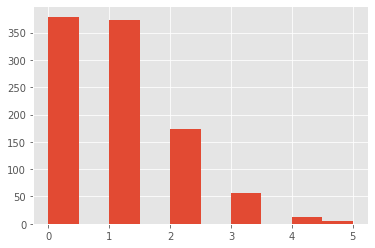

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

x = np.random.poisson(size=1000)

plt.hist(x)

(array([ 43.,  69., 328., 174., 142., 173.,  38.,  28.,   3.,   2.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

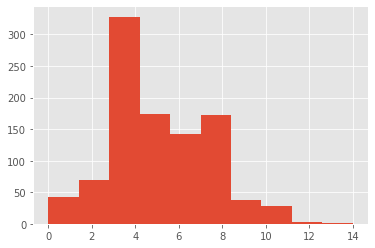

In [5]:
x = np.random.poisson(lam=5, size=1000)

plt.hist(x)

## Linear Models for Count Data - Poisson Regression

Unfortunately, the ANOVA method works only if the response has a Gaussian error. 

This can be remedied by fitting a Poisson (or Negative-Binomial) regression, with categorical features to indicate group membership, instead.

Suppose we have a sample of $n$ observations $y_1, \ldots, y_n$ which are i.i.d Poisson. We let $Y_i \sim \mu_i$. To create a linear model we let

$$ \log{\left(\mu_i\right)} = X_i^T\beta $$

or $ \mu_i = \exp{\left(X_i^T\beta\right)} $.

In this model $\exp{\beta_i}$ is how much the response changes when $X_i$ increases by one unit. The $\beta_i$ are estimated by maximum likelihood (or any method that can estimate linear models).

In particular when $X_i$ indicates group membership, $\exp{\beta_i}$ represents the mean response of group i.

In [1]:
## Worked Example

